In [1]:

## Import packages
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

/Users/PML/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/PML/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Breast Cancer Wisconsin Data Challenge

In this notebook we created a predictive machine learning model to predict benign and malignant breast cancer cells from tissue biopsies. Nine features were used for model development. We tested a 7 classification models using various model parameters for maximal recall (tumor detection with minimal false negatives). 
* There was limited variation across models; however, the non-parametric K-nearest neighbors performed best with high recall ~ 98%. 
* Due to concerns about scaling and intpretabilty we also tested several other models (Random Forest Classifer, RFC, and Logistic Regression). RFC identified several important diagnostic features. 
* Logistic regression improved substiantially when the l2 regularization was minimized. 

   -- -----------------------------------------
* Sample code number            id number
* Clump Thickness               1 - 10
* Uniformity of Cell Size       1 - 10
* Uniformity of Cell Shape      1 - 10
* Marginal Adhesion             1 - 1
* Single Epithelial Cell Size   1 - 10
* Bare Nuclei                   1 - 10
* Bland Chromatin               1 - 10
* Normal Nucleoli               1 - 10
* Mitoses                       1 - 10
  <br>
* Class:                        (2 for benign, 4 for malignant)


In [2]:
# List features
features = ['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [3]:
# Access Data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names = features)

In [4]:
# Glimpe data
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# Use transparant names for diagnoses
df.Class = df.Class.map({2:'Benign', 4:'Malignant'})

#### Assess null values

In [6]:
df.isnull().sum()

Sample_code_number             0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

#### Check types and convert data types to numeric

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             699 non-null int64
Clump_Thickness                699 non-null int64
Uniformity_of_Cell_Size        699 non-null int64
Uniformity_of_Cell_Shape       699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    699 non-null object
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null object
dtypes: int64(9), object(2)
memory usage: 60.1+ KB


In [8]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [9]:
df=df.replace(to_replace='?',value=np.nan)
df=df.dropna(how='any')

In [10]:
df.Bare_Nuclei = df.Bare_Nuclei.astype('int')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             683 non-null int64
Clump_Thickness                683 non-null int64
Uniformity_of_Cell_Size        683 non-null int64
Uniformity_of_Cell_Shape       683 non-null int64
Marginal_Adhesion              683 non-null int64
Single_Epithelial_Cell_Size    683 non-null int64
Bare_Nuclei                    683 non-null int64
Bland_Chromatin                683 non-null int64
Normal_Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null object
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [12]:
# Quick glimpse of tumor features (mean values) in relation to diagnosis
df.groupby('Class').mean()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
Class,,,,,,,,,,
Benign,1.115261e+06,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315
Malignant,1.005121e+06,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510


In [13]:
df.Class.value_counts()

Benign       444
Malignant    239
Name: Class, dtype: int64

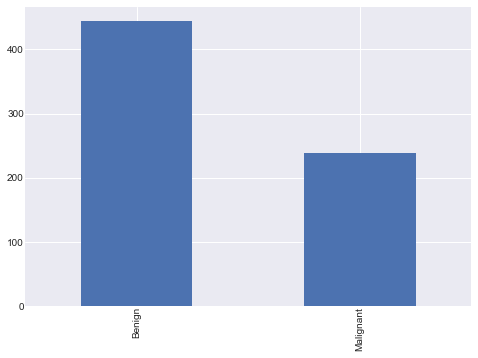

In [14]:
df.Class.value_counts().plot(kind = 'bar')
plt.show()

In [15]:
# For visual comparisons of differential diagnosis...
# create to dataframes - one for benign, one for malignant tumor data

df_b = df[df['Class'] == 'Benign']

df_m = df[df['Class'] == 'Malignant']

In [16]:
df.drop('Sample_code_number', axis = 1, inplace = True)

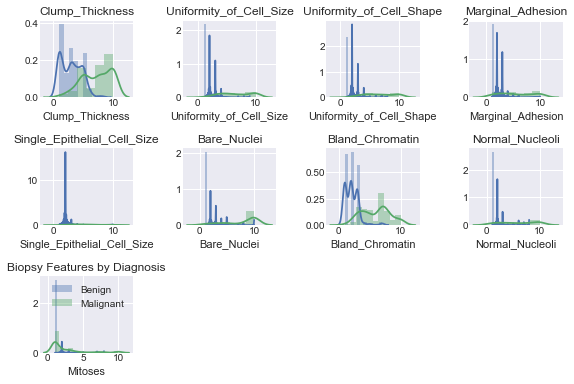

In [17]:
# Instantiate a figure object for OOP figure manipulation.
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(df.columns[:-1]):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    
    sns.distplot(df_b[b], kde=True, label='Benign')
    sns.distplot(df_m[b], kde=True, label='Malignant')
   
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.title('Biopsy Features by Diagnosis')

plt.savefig('Biopsy.png', dpi=200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()

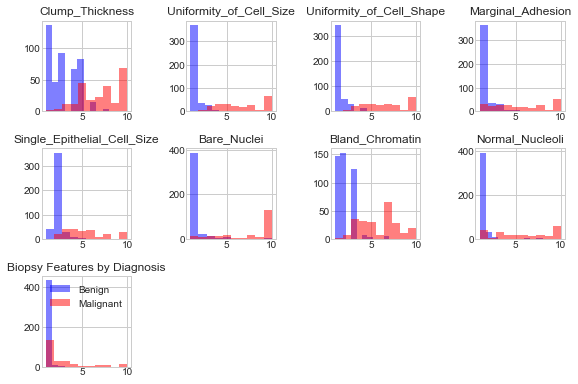

In [18]:
# Instantiate a figure object for OOP figure manipulation.
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(df.columns[:-1]):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    
    
    ax.hist(df_b[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(df_m[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
   
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.title('Biopsy Features by Diagnosis')

plt.savefig('Biopsy.png', dpi=200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()

In [19]:
df_corr = df.drop('Class', axis = 1).corr()

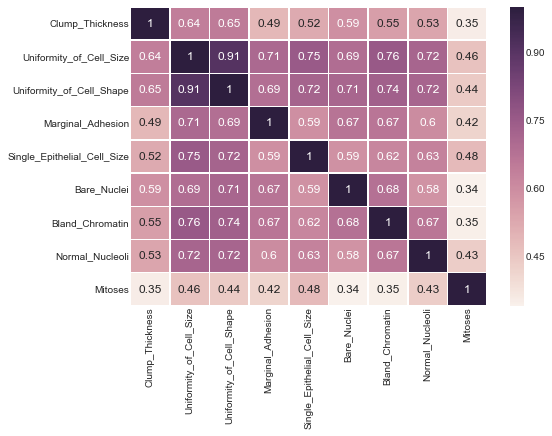

In [20]:
sns.heatmap(df.corr(), annot=True, linewidths=.5)
plt.show()

In [21]:
df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,Benign
1,5,4,4,5,7,10,3,2,1,Benign
2,3,1,1,1,2,2,3,1,1,Benign
3,6,8,8,1,3,4,3,7,1,Benign
4,4,1,1,3,2,1,3,1,1,Benign


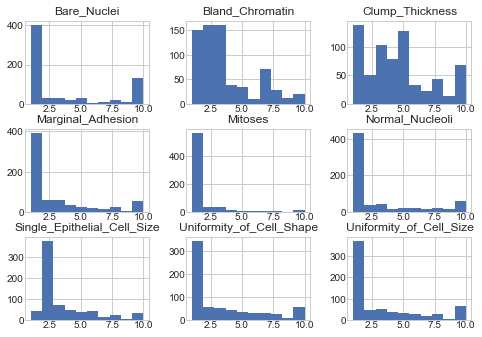

In [22]:
df.hist()
plt.show()

In [23]:
from scipy.stats import skew, skewtest

In [24]:
skewtest(df.Bare_Nuclei)

SkewtestResult(statistic=9.0364965862098821, pvalue=1.6177341292207933e-19)

In [25]:
skewtest(df.Clump_Thickness)

SkewtestResult(statistic=5.8887561797705308, pvalue=3.8911301616768769e-09)

In [26]:
df.Uniformity_of_Cell_Size = np.log(df.Uniformity_of_Cell_Size)
df.Uniformity_of_Cell_Shape = np.log(df.Uniformity_of_Cell_Shape)
df.Marginal_Adhesion = np.log(df.Marginal_Adhesion)
df.Single_Epithelial_Cell_Size = np.log(df.Single_Epithelial_Cell_Size)
df.Bare_Nuclei = np.log(df.Bare_Nuclei)
df.Normal_Nucleoli = np.log(df.Normal_Nucleoli)
df.Mitoses = np.log(df.Mitoses)

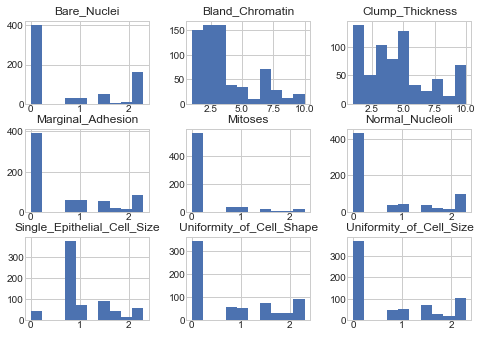

In [27]:
df.hist()
plt.show()

# Machine learning

In [28]:
df.Class = df.Class.map({'Benign':0, 'Malignant':1})

In [37]:
# load train_test_split
from sklearn.cross_validation import train_test_split

# split
test_ratio = 0.25
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1:], test_size=test_ratio, random_state=33)

### Normalize features

In [38]:
# Normalize features with normalize() method. Testing
from sklearn.preprocessing import Normalizer
norm = Normalizer()

X_train = norm.fit_transform(X_train).copy()
X_test = norm.transform(X_test).copy()

### TEST MODELS WITH DEFAULT PARAMETERS

In [39]:

# Prepare lists of algorithms to be used.

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', MultinomialNB()))

In [40]:

# Create loop to serially evaluate models using kfold and cross validation then print performance accuracy.

results = []
names = []
scoring = 'recall'
for name, model in models:
    kfold= KFold(len(X_train), n_folds = 5, random_state=20, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    mod = model
    msg = "CV Recall %s: %f SD %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

CV Recall LR: 0.785714 SD 0.070999
CV Recall LDA: 0.926857 SD 0.025285
CV Recall KNN: 0.949714 SD 0.031965
CV Recall DTC: 0.843286 SD 0.069976
CV Recall RFC: 0.919857 SD 0.038488
CV Recall SVM: 0.829286 SD 0.063503
CV Recall NB: 0.191857 SD 0.080495


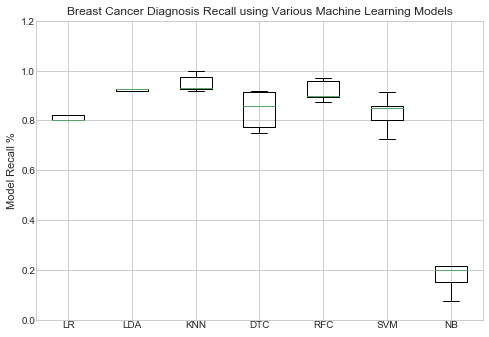

In [117]:
# Visualize model accuracies for comparision - boxplots will be appropriate to visualize 
# data variation

plt.boxplot(results, labels = names)
plt.title('Breast Cancer Diagnosis Recall using Various Machine Learning Models')
plt.ylabel('Model Recall %')
sns.set_style("whitegrid")
plt.ylim(0,1.2)
plt.show()

## TEST MODEL WITH OPTIMIZATION

In [41]:

# Define parameters optimization with GridSearchCV.  

SVM_params = {'C':[0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3],}
KNN_params = {'n_neighbors':[1,5,10,20], 'p':[2]}
RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy', 'gini'], 'max_depth':[10, 50, 100]}
NB_mult_params = {'alpha':[1,10]}

In [42]:
# Make list of models to test with paramter dictionaries.  

models_opt = []

models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
models_opt.append(('SVM', SVC(), SVM_params))
models_opt.append(('NB', MultinomialNB(), NB_mult_params))

In [46]:
# Serially evaluate models with GridSearchCV using defined parameters and print performance as accuracies with SDs.

results_params = []
names_params = []
scoring = 'recall'

for name, model, params in models_opt:
    kfold= KFold(len(X_train), n_folds = 5, random_state=2, shuffle=True)
    model_grid = GridSearchCV(model, params)
    cv_results_params = cross_val_score(model_grid, X_train, np.ravel(y_train), cv=kfold, scoring=scoring)
    results_params.append(cv_results_params)
    names_params.append(name)
    msg = "CV Recall %s: %f (%f)" % (name, cv_results_params.mean(), cv_results_params.std())
    print(msg)

CV Recall LR: 0.911364 (0.071669)
CV Recall LDA: 0.929075 (0.043278)
CV Recall KNN: 0.975332 (0.030266)
CV Recall DTC: 0.827189 (0.093690)
CV Recall RFC: 0.922624 (0.023931)
CV Recall SVM: 0.935705 (0.062166)
CV Recall NB: 0.192255 (0.051610)


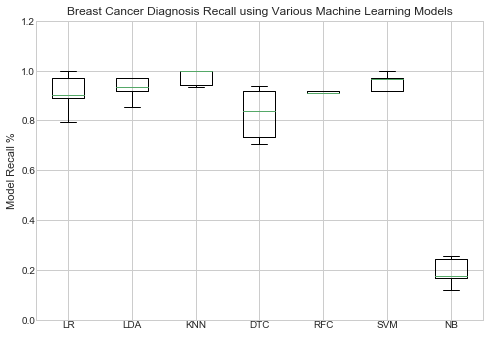

In [118]:
# Visualize model accuracies for comparision - boxplots will be appropriate to visualize 
# data variation

plt.boxplot(results_params, labels = names_params)
plt.title('Breast Cancer Diagnosis Recall using Various Machine Learning Models')
plt.ylabel('Model Recall %')
sns.set_style("whitegrid")
plt.ylim(0,1.2)
plt.show()

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# LogisticRegression and SGDClassifier
lr = LogisticRegression(C=100)


# fit
lr.fit(X_train, y_train)
# predict
lr_y_predict = lr.predict(X_test)


In [120]:
# 
from sklearn.metrics import classification_report

# metrics
print('Accuracy of LR Classifier:', lr.score(X_test, y_test))
# 
print(classification_report(y_test, lr_y_predict, target_names=['Benign', 'Malignant']))

('Accuracy of LR Classifier:', 0.96491228070175439)
             precision    recall  f1-score   support

     Benign       0.97      0.97      0.97       100
  Malignant       0.96      0.96      0.96        71

avg / total       0.96      0.96      0.96       171



In [96]:
confusion_matrix(y_test, lr_y_predict)

array([[97,  3],
       [ 3, 68]])

In [121]:
# Train RFC on whole training set

# Instantiate RFC with optimal parameters
RFC = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit RFC to training data
RFC.fit(X_train, y_train)

# Predict on training data using fitted RFC

# Evalaute RFC with test data
RFC_predicted = RFC.predict(X_test)
print('Model accuracy on test data: {}'.format(accuracy_score(y_test, RFC_predicted)))

/Users/PML/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Model accuracy on test data: 0.964912280702


In [122]:
# Create dataframe by zipping RFC feature importances and column names
rfc_features = pd.DataFrame(zip(RFC.feature_importances_, df.columns[:-1]), columns = ['Importance', 'Features'])

# Sort in descending order for easy organization and visualization
rfc_features = rfc_features.sort_values(['Importance'], ascending=False)

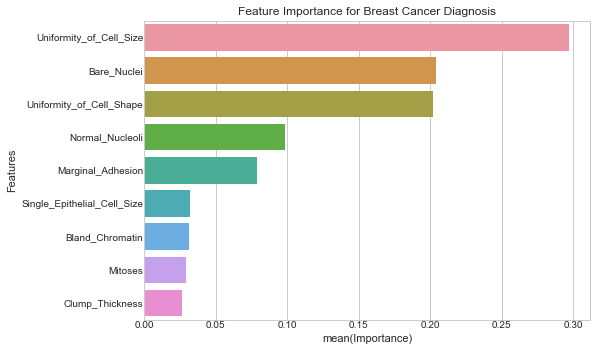

In [123]:
# Visualize RFC feature importances
sns.barplot(x = 'Importance', y = 'Features', data = rfc_features, )
plt.title('Feature Importance for Breast Cancer Diagnosis')
sns.set_style("whitegrid")
plt.show()

In [124]:
# Instantiate new logistic regression for use with scikit-learn's recursive feature elimination
lr = LogisticRegression(C = 100)

# Instantiate RFECV with logistic regression classifier
selector = RFECV(lr, cv = 10, scoring='recall')

# Fit RFECV to training data
selector.fit(X_train, y_train)

RFECV(cv=10,
   estimator=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='recall', step=1, verbose=0)

Logistic Regression Model Recall with Feature Elimination
Optimal number of features: 9
['Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']


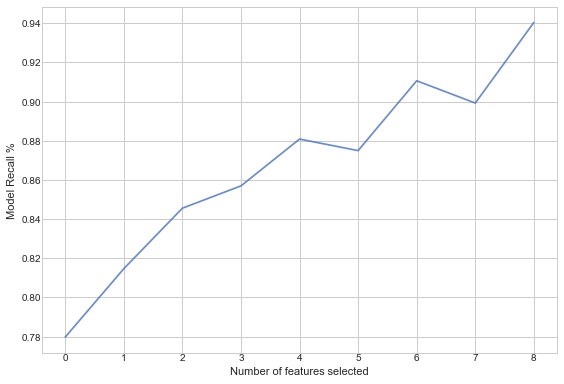

In [125]:
df_selector = df.iloc[:,:-1]
#Plot number of features VS. cross-validation scores

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Model Recall %")
plt.plot(selector.grid_scores_, alpha=0.8)
plt.tight_layout()
sns.set_style("whitegrid")

print('Logistic Regression Model Recall with Feature Elimination')
print('Optimal number of features: {}'.format(selector.n_features_))
print([i for i in list(df_selector.columns[selector.support_])])
plt.show()